In [30]:

%matplotlib inline

import contextily as cx
import geopandas
import numpy as np
import pandas
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

/var/folders/k2/vfj0bwz90l769x8ld8nw9x340000gn/T/ipykernel_4535/174994923.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  xlim = ([site.buffer(0.1).total_bounds[0]-.04,  site.buffer(0.1).total_bounds[2]+.04])
/var/folders/k2/vfj0bwz90l769x8ld8nw9x340000gn/T/ipykernel_4535/174994923.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  xlim = ([site.buffer(0.1).total_bounds[0]-.04,  site.buffer(0.1).total_bounds[2]+.04])
/var/folders/k2/vfj0bwz90l769x8ld8nw9x340000gn/T/ipykernel_4535/174994923.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ylim = ([site.buffer(0.1).to

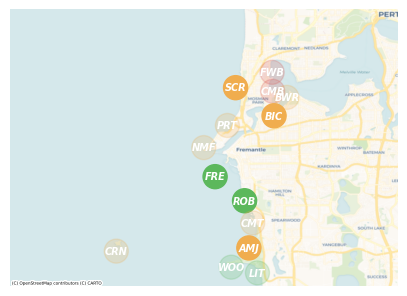

In [51]:
site_code="NMF"
data_url = "https://vis.report/sites_display.geojson"
sites = geopandas.read_file(data_url)
reports = pandas.json_normalize(sites['last_report'])
reports["alpha"] = np.where(reports.recent == 'True', 1, 0.2)
reports["rank"] = pandas.cut(reports.visibility, [0, 3.1, 8.1, 15.1, 25], right=False, labels=['<3m', '3-8m','8-15m', '15+']).values.add_categories('None')
reports["rank"] = reports["rank"].fillna('None')


colors = {'<3m':'#d9534f', '3-8m':'#f0ad4e', '8-15m':'#5cb85c', '15+':'#0275d8', 'None':'#868e96'}

site = sites.set_index('id', append=True, drop=False).xs(site_code, level=1)
xlim = ([site.buffer(0.1).total_bounds[0]-.04,  site.buffer(0.1).total_bounds[2]+.04])
ylim = ([site.buffer(0.1).total_bounds[1],  site.buffer(0.1).total_bounds[3]])

ax = sites.plot(c=reports['rank'].map(colors), alpha = reports.alpha, markersize =300, figsize=(5, 5))

ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_axis_off()

for i, (x, y) in enumerate(zip(sites.geometry.x, sites.geometry.y), start=0):
    ax.annotate(str(sites['id'][i]), (x,y), xytext=(0,0),fontsize=7, textcoords='offset points',
     ha='center', va='center', style='italic',weight='bold', color='white')


cx.add_basemap(ax,source=cx.providers.CartoDB.Voyager, crs=sites.crs.to_string(), attribution_size=3)
plt.show()